Step 11: 2D Laplace Equation
----
***

Here is Laplace's equation in 2D:

$$\frac{\partial ^2 p}{\partial x^2} + \frac{\partial ^2 p}{\partial y^2} = 0$$

We know how to discretize a 2nd order derivative. But think about this for a minute — Laplace's equation has the features typical of diffusion phenomena. For this reason, it has to be discretized with *central differences*, so that the discretization is consistent with the physics we want to simulate. 

The discretized equation is:

$$\frac{p_{i+1, j}^n - 2p_{i,j}^n + p_{i-1,j}^n}{\Delta x^2} + \frac{p_{i,j+1}^n - 2p_{i,j}^n + p_{i, j-1}^n}{\Delta y^2} = 0$$

Notice that the Laplace Equation does not have a time dependence — there is no $p^{n+1}$.  Instead of tracking a wave through time (like in the previous steps), the Laplace equation calculates the equilibrium state of a system under the supplied boundary conditions.  

If you have taken coursework in Heat Transfer, you will recognize the Laplace Equation as the steady-state heat equation.  

Instead of calculating where the system will be at some time $t$, we will iteratively solve for $p_{i,j}^n$ until it meets a condition that we specify.  The system will reach equilibrium only as the number of iterations tends to $\infty$, but we can approximate the equilibrium state by iterating until the change between one iteration and the next is *very* small.  

Let's rearrange the discretized equation, solving for $p_{i,j}^n$:

$$p_{i,j}^n = \frac{\Delta y^2(p_{i+1,j}^n+p_{i-1,j}^n)+\Delta x^2(p_{i,j+1}^n + p_{i,j-1}^n)}{2(\Delta x^2 + \Delta y^2)}$$

Using second-order central-difference schemes in both directions is the most widely applied method for the Laplace operator. It is also known as the **five-point difference operator**.

We are going to solve Laplace's equation numerically by assuming an initial state of $p=0$ everywhere. Then we add boundary conditions as follows:

$p=0$ at $x=0$

$p=y$ at $x=2$

$\frac{\partial p}{\partial y}=0$ at $y=0, \ 1$

Under these conditions, there is an analytical solution for Laplace's equation:

$$p(x,y)=\frac{x}{4}-4\sum_{n=1,odd}^{\infty}\frac{1}{(n\pi)^2\sinh2n\pi}\sinh n\pi x\cos n\pi y$$



In [1]:
import numpy as np
from matplotlib import pyplot as plt, cm
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def plot2D(x,y,p):  # define a function for visulizing 2d plot
    fig = plt.figure(figsize = (11,7), dpi=100)
    ax = fig.add_subplot(111, projection='3d')
    # The '111' means a grid of 1 row and 1 column and this subplot is the first one.
    X, Y = np.meshgrid(x,y)
    surf = ax.plot_surface(X,Y,p,cmap=cm.viridis)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$');

$$p_{i,j}^n = \frac{\Delta y^2(p_{i+1,j}^n+p_{i-1,j}^n)+\Delta x^2(p_{i,j+1}^n + p_{i,j-1}^n)}{2(\Delta x^2 + \Delta y^2)}$$

In [3]:
def laplace2d(p, y, dx, dy, l1norm_target):
    l1norm = 1
    pn = np.zeros_like(p)
    
    while l1norm > l1norm_target:
        pn = p.copy()
        p[1:-1,1:-1] = ((dy**2 * (pn[2:,1:-1] + pn[:-2,1:-1]) +
                        dx**2 * (pn[1:-1,2:] + pn[1:-1,:-2])) /
                        (2 * (dx**2 + dy**2)))
        p[0,:] = 0  # p = 0 @ x = 0
        p[-1:,] = y # p = y @ x = 2
        p[:,0] = p[:,1] # dp/dy = 0 @ y = 0
        p[:,-1] = p[:,-2] # dp/dy = 0 @ y = 2  
        l1norm = (np.sum(np.abs(p[:])-np.abs(pn[:])) / np.sum(np.abs(pn[:])))
    return p

`laplace2d` takes five arguments, the `p` matrix, the `y`-vector, `dx`, `dy` and the value `l1norm_target`.  This last value defines how close the `p` matrix should be in two consecutive iterations before the loop breaks and returns the calculated `p` value.  

Note that when executing the cells above in your own notebook, there will be no output.  You have *defined* the function but you have not yet *called* the function.  It is now available for you to use, the same as `numpy.linspace` or any other function in our namespace.  

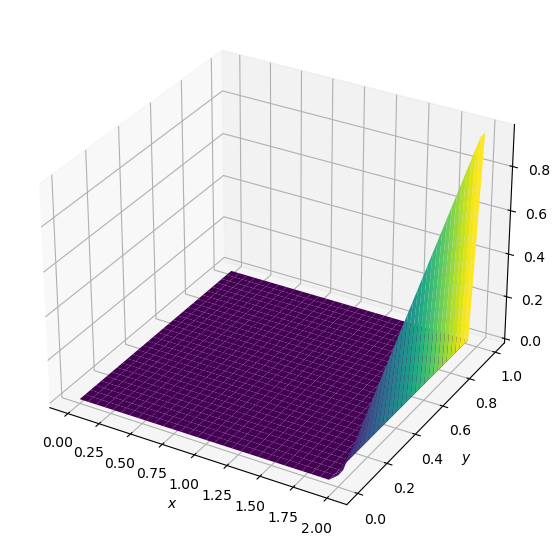

In [4]:
##variable declarations
nx = 31
ny = 31
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)


##initial conditions
p = np.zeros((nx, ny))  # create a XxY vector of 0's


##plotting aids
x = np.linspace(0, 2, nx)
y = np.linspace(0, 1, ny)

##boundary conditions
p[:, 0] = 0  # p = 0 @ x = 0
p[:, -1] = y  # p = y @ x = 2
p[0, :] = p[1, :]  # dp/dy = 0 @ y = 0
p[-1, :] = p[-2, :]  # dp/dy = 0 @ y = 1

p_init = p.copy()

#hit the **tab** key for auto-complete options.  
plot2D(x,y,p_init)

In [5]:
p = laplace2d(p, y, dx, dy, 1e-4)

It worked!  This is the initial state of our problem, where the value of `p` is zero everywhere except for along $x=2$ where $p=y$.  Now let's try to run our `laplace2d` function with a specified L1 target of .01

[Hint: if you are having trouble remembering the order in which variables are sent to a function, you can just type `laplace2d(` and the iPython Notebook will put up a little popup box to remind you]

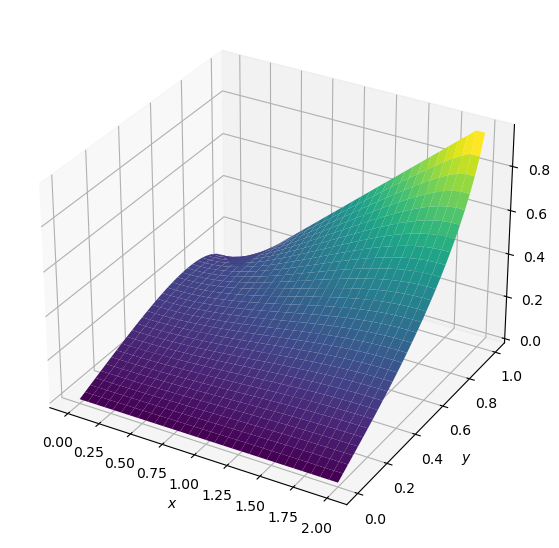

In [6]:
plot2D(x, y, p)